In [3]:
# Setup code for Google Colab
USE_COLAB = True
if USE_COLAB:
    print("Using Colab!")
    %load_ext autoreload
    %autoreload 2

    from google.colab import drive
    drive.mount('/content/drive')

    import os
    GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'EECS545/SVM-Variations'
    GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
    print(os.listdir(GOOGLE_DRIVE_PATH))

    import sys
    sys.path.append(GOOGLE_DRIVE_PATH)

    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    import torchvision
    import statistics
    import random
    import time
    import math
    import numpy as np
    import cv2
    import copy
    import shutil
    import os
    import json

    import matplotlib.pyplot as plt
    %matplotlib inline

    !pip3 install -q idx2numpy

    # install qp solver
    !pip3 install -q qpth
    import qpth

    if torch.cuda.is_available:
      print('Good to go!')
    else:
      print('Please set GPU via Edit -> Notebook Settings.')

## Test on toy example

X: torch.Size([400, 2]) , Y: torch.Size([400]) , on cpu
start QP...
accuracy =  1.0


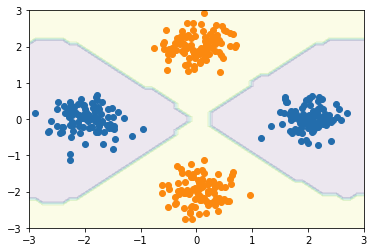

In [2]:
# Test kernel SVM by toy example
import torch
# import qpth
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt
from functions import *
import scipy.io as sio
from KernelSVM import *

# Colab with GPU
# X, Y = load_data("toy_example", os.path.join(GOOGLE_DRIVE_PATH, "Data/toy_data.mat"), "gpu")
# plot_data(X.cpu(), Y.cpu())
# Colab with CPU
# X, Y = load_data("toy_example", os.path.join(GOOGLE_DRIVE_PATH, "toy_data.mat")) # four clusters
# plot_data(X, Y)
# Run locally with CPU
X, Y = load_data("toy_example") # four clusters
plot_data(X, Y)

# kernel = linear_kernel
kernel = gaussian_kernel
KSVM = apply_KSVM(kernel, X, Y, C=1e-2)#C=None, eps=1e-5
KSVM.plot_classifier([-3, 3, -3, 3])
# G torch.Size([400, 400]) h torch.Size([400])

## Test on Mnist dataset

In [2]:
# Mnist Test Code
import torch
import qpth
from KernelSVM import *
import Mnist_loader as mnist
x_train, y_train, x_test, y_test = mnist.load_odd_even_Mnist(num_train=600, num_test=100, USE_COLAB=True, path=GOOGLE_DRIVE_PATH)
x_train, x_test, mu, std = mnist.preprocess_Mnist(x_train, x_test)

# Our implement
kernel = gaussian_kernel
print("apply KSVM")
t0 = time.time()
apply_KSVM(kernel, x_train, y_train, x_test, y_test, cross=True) #, x_test, y_test, C=1e2, eps=1e-3, cross=True
t1 = time.time()-t0
print("t1 = ", t1)
# O(n_samples^2 * n_features)

apply KSVM
start QP...
start QP...
start QP...
at C = None and eps = 1e-06 we get acc = 0.5083333253860474
start QP...
start QP...
start QP...
at C = None and eps = 1e-05 we get acc = 0.49166667461395264
start QP...
start QP...
start QP...
at C = None and eps = 0.0001 we get acc = 0.5083333253860474
start QP...
start QP...
start QP...
at C = None and eps = 0.001 we get acc = 0.4933333396911621
Max we get at: C: None and eps = 1e-06 we get acc = 0.5083333253860474
start QP...
accuracy =  0.5
t1 =  308.28234815597534


In [5]:
# Our implement
kernel = gaussian_kernel
print("apply KSVM")
t0 = time.time()
apply_KSVM(kernel, x_train, y_train, x_test, y_test, C=1e-2) #, x_test, y_test, C=1e2, eps=1e-3, cross=True
t1 = time.time()-t0
print("t1 = ", t1)
# O(n_samples^2 * n_features)

apply KSVM


NameError: name 'x_train' is not defined

In [3]:
# sklearn
x_train, y_train, x_test, y_test = mnist.load_odd_even_Mnist(USE_COLAB=True, path=GOOGLE_DRIVE_PATH)#num_train=600, num_test=100, 
x_train, x_test, mu, std = mnist.preprocess_Mnist(x_train, x_test)
print("apply KSVM")
t0 = time.time()
apply_sklearn_ksvm(x_train, y_train, x_test, y_test)
t1 = time.time()-t0
print("t1 = ", t1)

apply KSVM
tensor(0.9807)
t1 =  1550.0617175102234


## Test on SVM Guide 1

In [7]:
# SVMGuide1 Test Code
from SVMGuide_loader import load_SVMGuide1
x_train, y_train, x_test, y_test, mu, std = load_SVMGuide1(USE_COLAB, GOOGLE_DRIVE_PATH)

# Our implement
kernel = gaussian_kernel
print("apply KSVM")
t0 = time.time()
apply_KSVM(kernel, x_train, y_train, x_test, y_test, C=None, eps=1e-3) #, x_test, y_test
t1 = time.time()-t0
print("t1 = ", t1)

apply KSVM


KeyboardInterrupt: ignored

In [4]:
# sklearn
from SVMGuide_loader import load_SVMGuide1
x_train, y_train, x_test, y_test, mu, std = load_SVMGuide1(USE_COLAB, GOOGLE_DRIVE_PATH)

print("apply KSVM")
t0 = time.time()
apply_sklearn_ksvm(x_train, y_train, x_test, y_test)
t1 = time.time()-t0
print("t1 = ", t1)

apply KSVM
tensor(0.9675)
t1 =  0.12215852737426758


## No use

In [ ]:
# test qp example (Ans: 0.2500, 0.7500)
Q = 2*torch.tensor([ [2, .5], [.5, 1] ])
p = torch.tensor([1.0, 1.0])
G = torch.tensor([[-1.0,0.0],[0.0,-1.0]])
h = torch.tensor([0.0,0.0])
A = torch.tensor([[1.0, 1.0]])
b = torch.tensor(1.0)
sol = qpth.qp.QPFunction(verbose=1)(Q, p, G, h, A, b)
print(sol)

iter: 0, pri_resid: 2.98023e-08, dual_resid: 2.35702e+00, mu: 5.55556e-01
iter: 1, pri_resid: 6.66400e-08, dual_resid: 6.12515e-02, mu: 1.76824e-02
iter: 2, pri_resid: 5.96046e-08, dual_resid: 2.38419e-07, mu: 3.11300e-04
iter: 3, pri_resid: 5.96046e-08, dual_resid: 1.19209e-07, mu: 3.14115e-07
iter: 4, pri_resid: 1.78814e-07, dual_resid: 1.19209e-07, mu: 3.14099e-10
iter: 5, pri_resid: 1.49012e-08, dual_resid: 0.00000e+00, mu: 3.14085e-13
iter: 6, pri_resid: nan, dual_resid: nan, mu: nan
iter: 7, pri_resid: nan, dual_resid: nan, mu: nan
iter: 8, pri_resid: nan, dual_resid: nan, mu: nan
tensor([[0.2500, 0.7500]])


In [ ]:
# %cd /content
# os.chdir(GOOGLE_DRIVE_PATH)
#drive/MyDrive/EECS545/SVM-Variations
# !pwd
# print(GOOGLE_DRIVE_PATH)


/content
/content
